In [1]:
#ignore annoying deprecation warnings
import warnings
warnings.filterwarnings('ignore')

# Advanced Charts in Python!

## Introduction

Human beings are highly visual creatures, and the ability to effectively convey information in a visual format is therefore a critical skill in data science. Creating appropriate charts is not only a useful way of presenting information to decision makers, but it can also be extremely useful for a data scientist herself as she seeks to better understand and gain insights into the nature of her data while analyzing a data set. Effective charts help data scientists to identify and pursue interesting avenues of exploration, which often lead to valuable and unexpected discoveries.

In this module, we'll learn techniques for creating a variety of advanced charts in Python including 

## Load Libraries and Data

Before we begin creating our advanced charts, we'll first need to load the relevant visualization libraries. For our purposes, we'll be using **pyplot** from the *matplotlib* library, as well as **seaborn**, which is a Python data visualization library that is built on *matplotlib*. **Seaborn** provides a high-level interface for drawing attractive and informative statistical charts.

We'll also need to load and prepare the data that will form the basis of our visualiztions. We'll be using the Galton Families data set in this lesson...

In [2]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

#the inline magic command allows plots to appear in a dataframe
%matplotlib inline

#get the Galton Families dataset and assign it to a pandas dataframe
df = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

#define a dictionary that specifies current and replacement values
genderCodes = {'male': 1, 'female': 0}

#use the dictionary to create a 'genderCode' dummy variable
df['genderCode'] = [genderCodes[i] for i in df['gender']]

#view the first 10 rows of data in the dataframe
df.head(10)

family  father  mother  midparentHeight  children  childNum  gender  \
0    001    78.5    67.0            75.43         4         1    male   
1    001    78.5    67.0            75.43         4         2  female   
2    001    78.5    67.0            75.43         4         3  female   
3    001    78.5    67.0            75.43         4         4  female   
4    002    75.5    66.5            73.66         4         1    male   
5    002    75.5    66.5            73.66         4         2    male   
6    002    75.5    66.5            73.66         4         3  female   
7    002    75.5    66.5            73.66         4         4  female   
8    003    75.0    64.0            72.06         2         1    male   
9    003    75.0    64.0            72.06         2         2  female   

   childHeight  genderCode  
0         73.2           1  
1         69.2           0  
2         69.0           0  
3         69.0           0  
4         73.5           1  
5         72.5           1  
6         65.5           0  
7         65.5           0  
8         71.0           1  
9         68.0           0

## Correlation Heatmap

For our first advanced chart, let's create a heatmap that visually depicts the strengths of the correlations among the numeric variables in our data set:

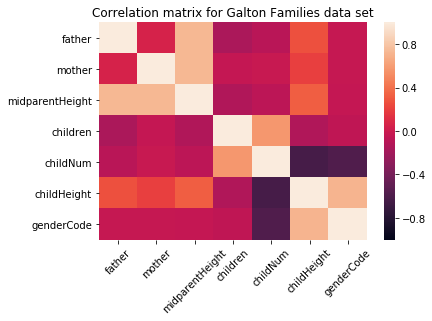

In [3]:
#compute the correlation matrix
correlation_matrix = df.corr()

#display the (textual) correlation matrix
correlation_matrix

#create and display a correlation heatmap
sns.heatmap(correlation_matrix, vmax=1.0, vmin=-1.0) 
plt.title('Correlation matrix for Galton Families data set')
plt.xticks(rotation='45')
plt.show()

Using different color palettes can dramatically change the interpretability of the heatmap:

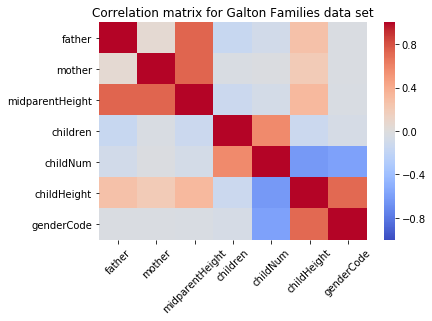

In [4]:
#draw the correlation heatmap using the 'coolwarm' palette
sns.heatmap(correlation_matrix, vmax=1.0, vmin=-1.0, cmap='coolwarm') 
plt.title('Correlation matrix for Galton Families data set')
plt.xticks(rotation='45')
plt.show()

## Jittered Scatter Plots

A basic scatter plot is often a useful way of gaining insights into the relationship between two variables. The Python code below, for example, creates a scatter plot that shows us the replationship between a child's height and the order in which a child was born within a family:

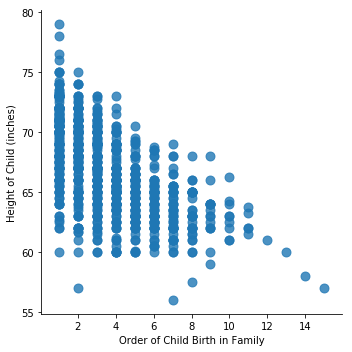

In [5]:
#draw a basic scatter plot that shows the relationship between childNum and childHeight
sns.lmplot('childNum', 'childHeight', df, scatter_kws={'s': 80}, fit_reg = False)
plt.xlabel('Order of Child Birth in Family')
plt.ylabel('Height of Child (inches)')
plt.show()

One of the greatest weaknesses of basic scatter plots like the one shown above is that it is very difficult to see the true density of the markers (dots), because the markers often directly overlap with one another. This problem is known as *over plotting*. A very useful strategy for handing the over plotting problem is to semi-transparent markers with a *jitter*. As shown below, a **jittered scatter plot** can convey information about marker density much more effectively than a basic scatter plot:

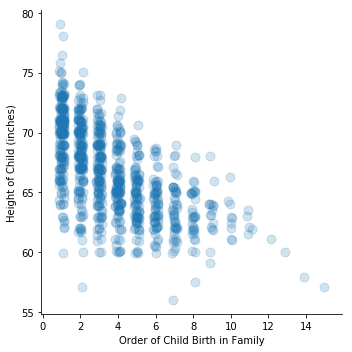

In [6]:
#draw a jittered scatter plot that shows the relationship between childNum and childHeight
sns.lmplot('childNum', 'childHeight', df, x_jitter=.15, y_jitter=.15, scatter_kws={'s': 80, 'alpha':0.2}, fit_reg = False)
plt.xlabel('Order of Child Birth in Family')
plt.ylabel('Height of Child (inches)')
plt.show()

We can also easily include a regression-based **line of best fit** by setting the *fit_reg* parameter to `True`:

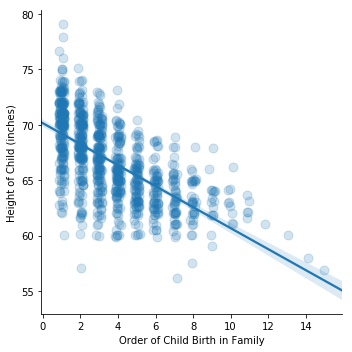

In [7]:
#draw a jittered scatter plot with a best-fit line
sns.lmplot('childNum', 'childHeight', df, x_jitter=.15, y_jitter=.15, scatter_kws={'s': 80, 'alpha':0.2}, fit_reg = True)
plt.xlabel('Order of Child Birth in Family')
plt.ylabel('Height of Child (inches)')
plt.show()

## Scatter Plots with Multiple Series

Scatter plots showing the relationship between two variables can be very useful, but sometimes we can gain more insights by displaying several data series on the same scatter plot. In practice, this often means looking separately at a relationship between two variables for each level or category of a third variable. The scatter plots above, for example, show the relationship between children's heights and the order in which they were born *for all children in the data set*. What if we wanted to visualize this relationship separately for male and female children? We can accomplish this in Python simply by setting the *hue* property equal to our categorical *gender* variable:

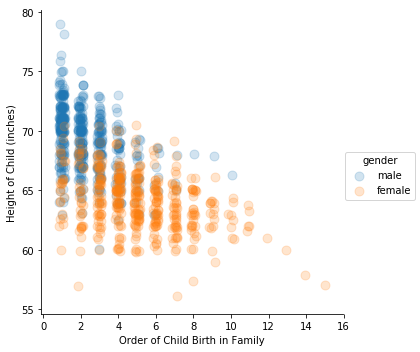

In [8]:
#draw a jittered scatter plot that shows the relationship between childNum and childHeight by gender
sns.lmplot('childNum', 'childHeight', data = df, hue = 'gender', x_jitter=.15, y_jitter=.15, scatter_kws={'s': 80, 'alpha':0.2}, fit_reg = False)
plt.xlabel('Order of Child Birth in Family')
plt.ylabel('Height of Child (inches)')
plt.show()

As before, we can easily include best fit lines for each gender category on our scatter plot by setting the *fit_reg* property to `True`:

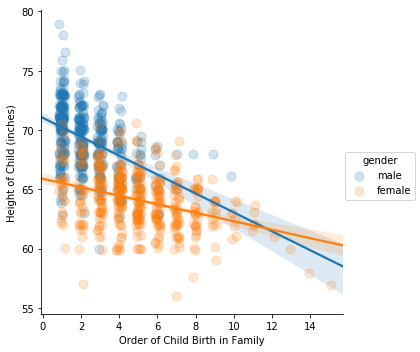

In [9]:
#draw a jittered scatter plot that shows the relationship between childNum and childHeight by gender
sns.lmplot('childNum', 'childHeight', data = df, hue = 'gender', x_jitter=.15, y_jitter=.15, scatter_kws={'s': 80, 'alpha':0.2}, fit_reg = True)
plt.xlabel('Order of Child Birth in Family')
plt.ylabel('Height of Child (inches)')
plt.show()

## Box Plots and Swarm Plots

A **box plot** is a useful way of visually comparing groups of numerical data through their quartiles. The *box* in a box plot represents the range of data from the 25th to 75th percentiles (i.e., the middle 50% of the data), with the horizontal line inside the box representing the median. Box plots also have lines extending vertically from the boxes (known as *whiskers*) that indicate the normal limits of the data (e.g., normal minimum and maximum values). Outliers are often depicted as individual points beyond the limits of the whiskers.

The Python code below generates a box plot that compares the heights of male and female children:

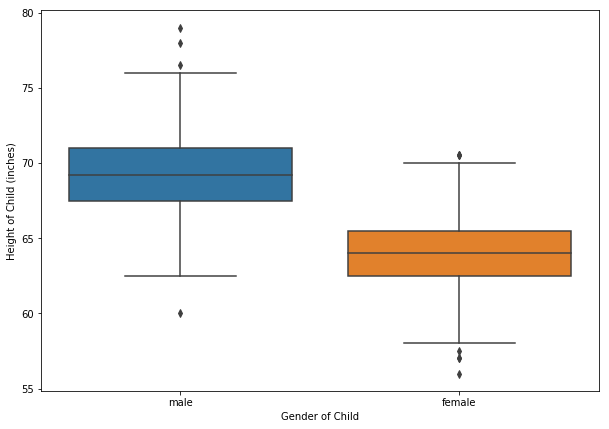

In [10]:
#draw a box plot that compares the heights of children by gender
ax = plt.figure(figsize=(10,7)).gca() #define axis
sns.boxplot(x = 'gender', y = 'childHeight', data = df, ax = ax)
plt.xlabel('Gender of Child')
plt.ylabel('Height of Child (inches)')
plt.show()

While box plots are useful in and of themselves, we can gain even more insights by superimposing a **swarm plot** on top of a box plot. A **swarm plot** is simply a scatter plot that is drawn with non-overlapping points. The locations of the points in a swarm plot are adjusted along the categorical axis so that they don’t overlap with one another, thus yielding greater insights into the distribution of the individual data points:

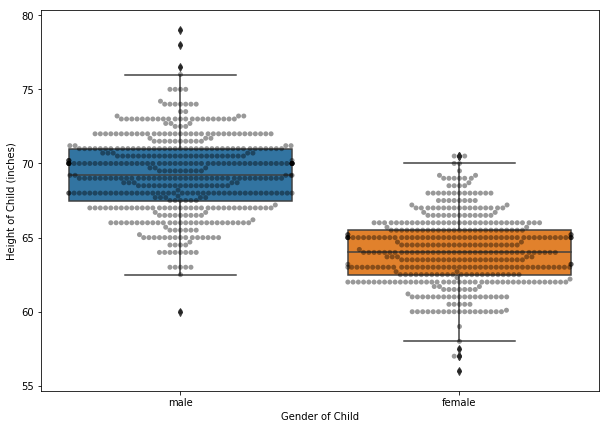

In [11]:
#draw a box plot with a superimposed swarm plot
ax = plt.figure(figsize=(10,7)).gca() #define axis
sns.boxplot(x = 'gender', y = 'childHeight', data = df, ax = ax)
sns.swarmplot(x = 'gender', y = 'childHeight', color = 'black', data = df, ax = ax, alpha = 0.4)
plt.xlabel('Gender of Child')
plt.ylabel('Height of Child (inches)')
plt.show()

## Violin Plots

**Violin plots** are similar to box plots in that they allow us to visualize how data are distributed across different levels of one or more categorical variables, thus allowing those distributions to be compared and better understood. In a box plot all of the elements of the plot correspond to actual data points. In a violin plot, however, the actual data points are represented by a **kernel density estimate (KDE)** of the underlying distribution. The name *violin plot* is derived from the fact that these plots often look a bit like a violin.

The Python code below generates a violin plot that compares the order in which children are born within a family male and female children by gender:

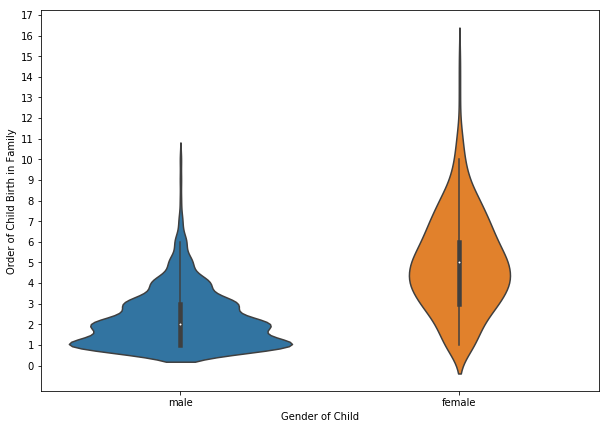

In [12]:
#draw a violin plot that compares the order in which children are born within a family by gender
ax = plt.figure(figsize=(10,7)).gca() #define axis
sns.violinplot(x = 'gender', y = 'childNum', data = df, ax = ax)
plt.xlabel('Gender of Child')
plt.ylabel('Order of Child Birth in Family')
plt.yticks(range(0, 18))
plt.show()

As with a box plot, we can easily superimpose a swarm plot on top of our violin plot:

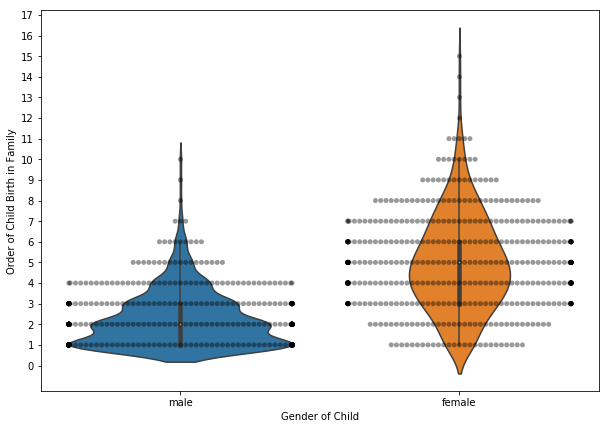

In [14]:
#draw a violin plot with a superimposed swarm plot
ax = plt.figure(figsize=(10,7)).gca() #define axis
sns.violinplot(x = 'gender', y = 'childNum', data = df, ax = ax)
sns.swarmplot(x = 'gender', y = 'childNum', color = 'black', data = df, ax = ax, alpha = 0.4)
plt.xlabel('Gender of Child')
plt.ylabel('Order of Child Birth in Family')
plt.yticks(range(0, 18))
plt.show()

## Histograms and Kernel Density Estimation Plots

A **histogram** is a useful way of visualizing the probability distribution for a single continuous variable. In a histogram, the range of values for the variable of interest is divided into a series of *bins*. Each bin is represented by a bar in the histogram, with the height of the bar being determined by the number of data points that fall within the range of the bin.

The Python code below generates a histogram for the heights of the children in the data set:

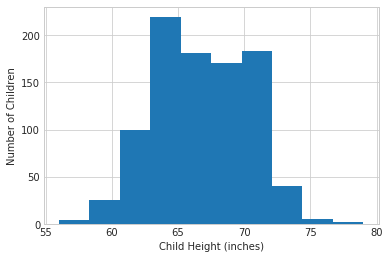

In [15]:
#draw a histogram of child heights
sns.set_style('whitegrid')
plt.hist(df['childHeight'], bins = 10)
plt.xlabel('Child Height (inches)')
plt.ylabel('Number of Children')
plt.show()

As noted above, a histogram is a useful way of visualizing the probability distribution for a single continuous variable. We can gain further insights into a variable's probability distribution by including a **kernel density estimate (KDE)** on our histogram. KDE uses a kernel to smooth the frequencies of the bins in the histogram, which yields a smoother probability density function that is usually a more accurate reflection of the underlying variable's actual probability distribution:

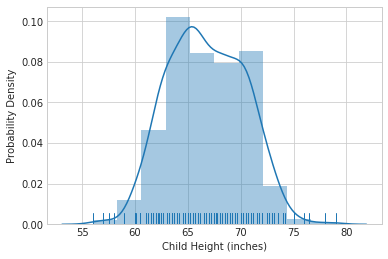

In [16]:
#draw a KDE plot with a histogram and a rug
sns.set_style('whitegrid')
sns.distplot(df['childHeight'], bins = 10, rug=True, hist = True)
plt.xlabel('Child Height (inches)')
plt.ylabel('Probability Density')
plt.show()

The small vertical lines at the bottom of the chart are called the **rug**. A rug is another way of depicting the density of the actual data points for the variable along the horizontal axis.

## Joint Plots

Histograms and kernel density estimation plots are useful for visualizing the probability distribution for a single continuous variable, but what if we wanted to examine the joint probability density of *two* variables? To accomplish this, we can generate a **joint plot**.

The code below generates a joint plot that shows the joint probability density of children's heights and the order in which a child was born within a family:

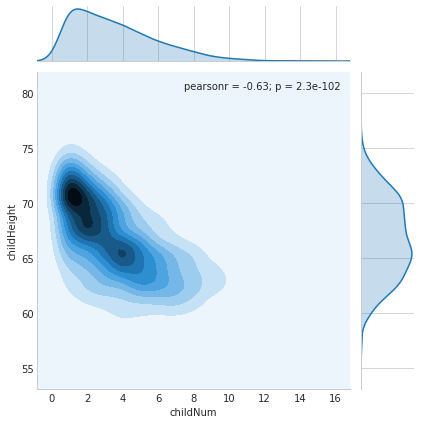

In [17]:
#draw a joint density plot that compares child heights to child birth order
sns.set_style('whitegrid')
sns.jointplot('childNum', 'childHeight', data = df, kind ='kde')
plt.show()

As you can see, the area inside the rectangle contains a **contour plot**, while KDE plots for each individual variable are drawn on the edges of the chart. Darker areas in the contour plot indicate a higher probability of values of the two variables appearing together.

If we prefer, we can display the same information using a **hex bin plot**:

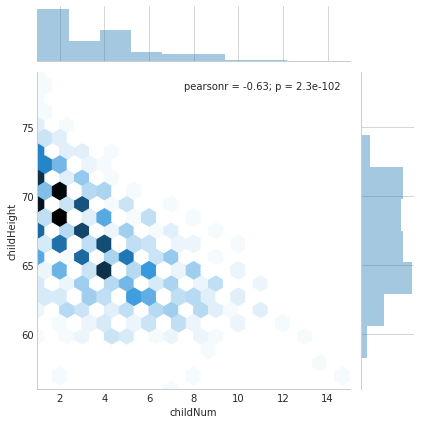

In [18]:
#draw a hex bin plot that compares child heights to child birth order
sns.set_style('whitegrid')
sns.jointplot('childNum', 'childHeight', data = df, kind ='hex', marginal_kws={'bins': 10})
plt.show()

## Pair Plots

Finally, a data scientist may occasionally want to simultaneously visualize the relationships among many different variables in a data set. For this purpose, we can create a **pair plot**.

The Python code below generates a pair plot that shows the relationships among a child's height (childHeight), the average height of the child's parents (midparentHeight), and the order in which a child was born within a family (childNum), with all of these relationships being considered in light of the child's gender:

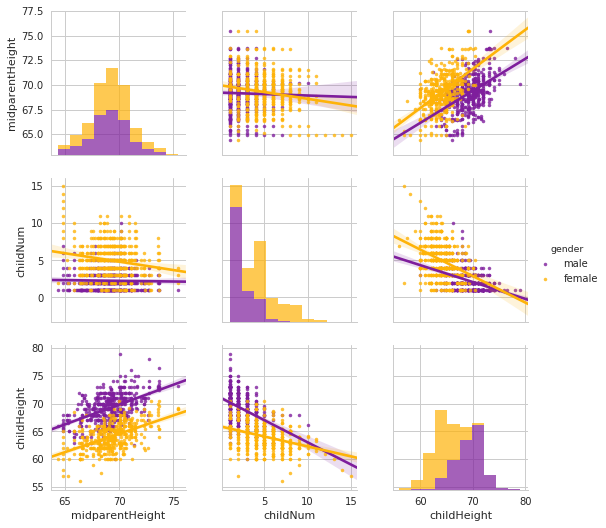

In [19]:
#draw a pair plot for midparentHeight, childNum, and childHeight by gender
sns.set(style='whitegrid', palette=sns.xkcd_palette(['purple', 'amber']))
#sns.color_palette("coolwarm", 7)
sns.pairplot(df[['midparentHeight', 'childNum', 'childHeight', 'gender']], hue='gender', kind='reg', markers='.', diag_kws={'alpha':0.7})
plt.show()